<a href="https://colab.research.google.com/github/shubh-ag/PHI/blob/master/PHI_separate_stress_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 3.2 MB/s 


In [ ]:
import neurokit2 as nk
import pandas as pd

In [18]:
data = nk.data(dataset="bio_eventrelated_100hz")
# pd.DataFrame({"EDA":data["EDA"]})
eda1 = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=2, drift=0.01)
eda2 = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=2, drift=0.05)
eda3 = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=2, drift=0.50)
eda4 = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=2, drift=0.01)
eda5 = nk.eda_simulate(duration=10, sampling_rate=250, scr_number=2, drift=0.01)


# signals, info = nk.eda_process(eda1, sampling_rate=250)
# nk.eda_plot(signals, sampling_rate=250)

# signals, info = nk.eda_process(eda2, sampling_rate=250)
# nk.eda_plot(signals, sampling_rate=250)

# signals, info = nk.eda_process(eda3, sampling_rate=250)
# nk.eda_plot(signals, sampling_rate=250)

eda1
# len(eda1)

array([0.98537007, 0.98545325, 0.98561902, ..., 1.12357018, 1.12352695,
       1.12348639])

In [2]:
!git clone https://github.com/shubh-ag/PHI

Cloning into 'PHI'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 71 (delta 19), reused 67 (delta 18), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [3]:
%cd /content/PHI/data/utd

/content/PHI/data/utd


In [51]:
#IMPORTS
import pandas as pd
import numpy as np
import os
from pandas import read_csv
import statistics
from sklearn.model_selection import train_test_split

In [42]:
# Create data frame using EDA data
data = []
for i in os.listdir():
  temp = read_csv(i+"/"+i+"AccTempEDA.csv")
  temp = temp.drop(['Hour','Minute','Second'], axis=1)
  interval = 8 #4Hz and we combine data for 2 secs
  subject_data = []
  for j in range(0, len(temp) - interval, interval):
    d = temp[j:j+interval]
    d_np = d.to_numpy()[:,:-1]
    minimum = np.amin(d_np, axis = 0).astype(float)
    maximum = np.amax(d_np, axis = 0).astype(float)
    average = np.average(d_np, axis = 0).astype(float)
    values, counts = np.unique(d['Label'], return_counts=True)
    mode = values[np.argmax(counts)]
    df = []
    df.extend(np.around(minimum, decimals=4))
    df.extend(np.around(maximum, 4))
    df.extend(np.around(average, 4))
    df.append(mode)
    subject_data.append(np.nan_to_num(df))
  
  # z_scores = []
  # for c in range(len(subject_data[0])):
  #   # print(len(subject_data[:,c]))
  #   # print(np.average(subject_data[:, c]))
  #   print(len((subject_data[:,c] - np.average(subject_data[:, c])) / np.std(subject_data[:,c])))
  # # (df[col] - df[col].mean())/df[col].std(ddof=0)
  data.extend(subject_data)



df = pd.DataFrame(data, columns=["min_acc_z","min_acc_x","min_acc_y","min_temp", "min_eda",
                             "max_acc_z","max_acc_x","max_acc_y","max_temp", "max_eda",
                             "avg_acc_z","avg_acc_x","avg_acc_y","avg_temp", "avg_eda",
                             "label"])

In [58]:
df_y = df['label']
df_x = df.drop(['label'], axis=1)

X_train, X_test, y_train, y_test  = train_test_split(df_x, df_y, test_size=0.2)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

36871
9218
36871
9218
Relax              19214
EmotionalStress     6750
CognitiveStress     5656
PhysicalStress      5251
Name: label, dtype: int64
Relax              4756
EmotionalStress    1733
CognitiveStress    1455
PhysicalStress     1274
Name: label, dtype: int64


In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


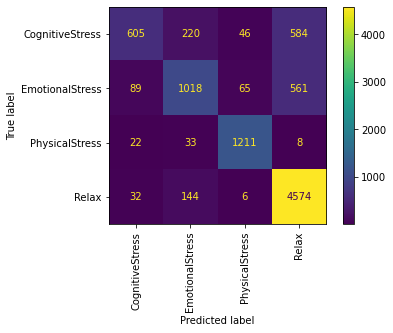

In [70]:
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)

0.7871762644126679


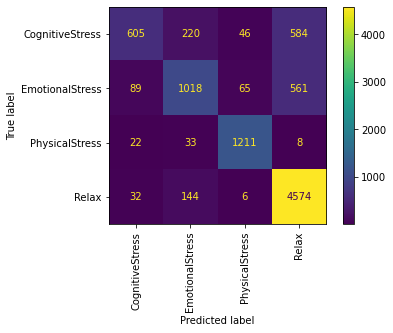

In [74]:
print(f1_score(y_test, y_pred, average='weighted'))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation='vertical')